images shape: torch.Size([1000, 1, 28, 28])
labels shape: torch.Size([1000])


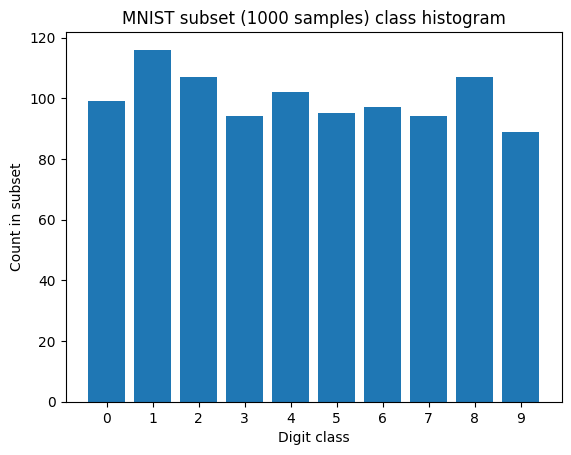

batched_images shape: torch.Size([40, 25, 1, 28, 28])


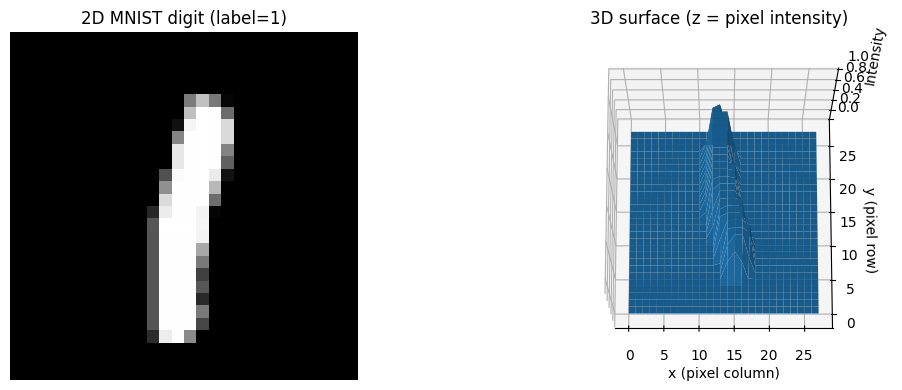

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np


#Download MNIST + subset(1000)

transform = transforms.ToTensor()  # -> tensor [1, 28, 28] in [0, 1]

mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transform)


#random 1000 samples
subset_idx = torch.randperm(len(mnist))[:1000].tolist()

mnist_subset = Subset(mnist, subset_idx)

#Convert images to normalized tensors
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])   # [1000, 1, 28, 28]
labels = torch.tensor([mnist_subset[i][1] for i in range(len(mnist_subset))])  # [1000]

print("images shape:", images.shape)
print("labels shape:", labels.shape)


#Histogram of classes

counts = torch.bincount(labels, minlength=10)

plt.figure()
plt.bar(range(10), counts.numpy())
plt.xticks(range(10))
plt.xlabel("Digit class")
plt.ylabel("Count in subset")
plt.title("MNIST subset (1000 samples) class histogram")
plt.show()


#Batch with einops (batch size = 25)

batch_size = 25
assert images.shape[0] % batch_size == 0, "Subset size must be divisible by batch size"

#[1000, 1, 28, 28] -> [num_batches, batch_size, 1, 28, 28]
batched_images = rearrange(images, '(b n) c h w -> b n c h w', n=batch_size)

print("batched_images shape:", batched_images.shape)  # expected: [40, 25, 1, 28, 28]


#show 2D digit + respeective 3D plot

idx = torch.randint(0, images.shape[0], (1,)).item()

img = images[idx, 0].cpu().numpy()   # [28, 28]
label = labels[idx].item()

x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = img

fig = plt.figure(figsize=(12, 4))

#2D view
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img, cmap="gray", origin="upper")
ax1.set_title(f"2D MNIST digit (label={label})")
ax1.axis("off")

#3D surface view
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(X, Y, Z)  # swap to wireframe if you prefer (see below)

#top down orientation for 3d view
ax2.view_init(elev=75, azim=-90)

ax2.set_title("3D surface (z = pixel intensity)")
ax2.set_xlabel("x (pixel column)")
ax2.set_ylabel("y (pixel row)")
ax2.set_zlabel("Intensity")

plt.tight_layout()
plt.show()


